## Shape testing

In [1]:
from circle import Circle
from rectangle import Rectangle
from shape import Shape
import utils as utl

shape1 = Shape(0,0)
shape2 = Shape(0,0)
shape3 = Shape(1,0)
circle1 = Circle(0,0,1)
rectangle1 = Rectangle(0,0,4,6)

print(f"{shape1 == shape2 = }") # True
print(f"{shape1 < shape2 = }") # False
print(f"{shape2 == shape3 = }") # False
print(f"{circle1 == shape1 = }") # False
print(f"{circle1 > shape1 = }") # True
print(f"{rectangle1 > circle1 = }") # True
print(f"{rectangle1 > shape3 = }") # True

shape1 == shape2 = True
shape1 < shape2 = False
shape2 == shape3 = False
circle1 == shape1 = False
circle1 > shape1 = True
rectangle1 > circle1 = True
rectangle1 > shape3 = True


## Cricle testing


In [2]:
from circle import Circle
from rectangle import Rectangle
from sphere import Sphere

circle1 = Circle(0, 1, 2)
sphere1 = Sphere(0, 1, 2)
circle2 = Circle(0 , 0, 6)
circle3 = Circle(0,0,1)
rectangle1 = Rectangle(2,3,5,7)
print(f"{circle1.area = } , {circle1.perimeter = }")
print(f"{circle2.area = } , {circle2.perimeter = }")
rectangle1 > circle1 , circle1 == sphere1, circle3.is_unit_circle(), circle1.is_unit_circle()

circle1.area = 12.566370614359172 , circle1.perimeter = 12.566370614359172
circle2.area = 113.09733552923255 , circle2.perimeter = 37.69911184307752


(True, False, True, False)

In [3]:
print(circle1)
circle1

A circle that is located at (x = 0 y = 1) it has a circumference of 12.566370614359172 and an area of 12.566370614359172)


Circle (x=0, y=1, radius=2, circumference=12.566370614359172, area=12.566370614359172

In [4]:
circle1 = Circle(0,0,1)
circle2 = Circle(0,0,1)
print (circle1)
circle3 = Circle(2,2,2)
circle4 = Circle(2,2,5)
circle1 == circle2, circle3 == circle4

A circle that is located at (x = 0 y = 0) it has a circumference of 6.283185307179586 and an area of 3.141592653589793)


(True, False)

In [5]:
circle1 > circle2, circle1 >= circle2, circle1 < circle3, circle3 < circle1

(False, True, True, False)

## Plotter

testing plotting a shape

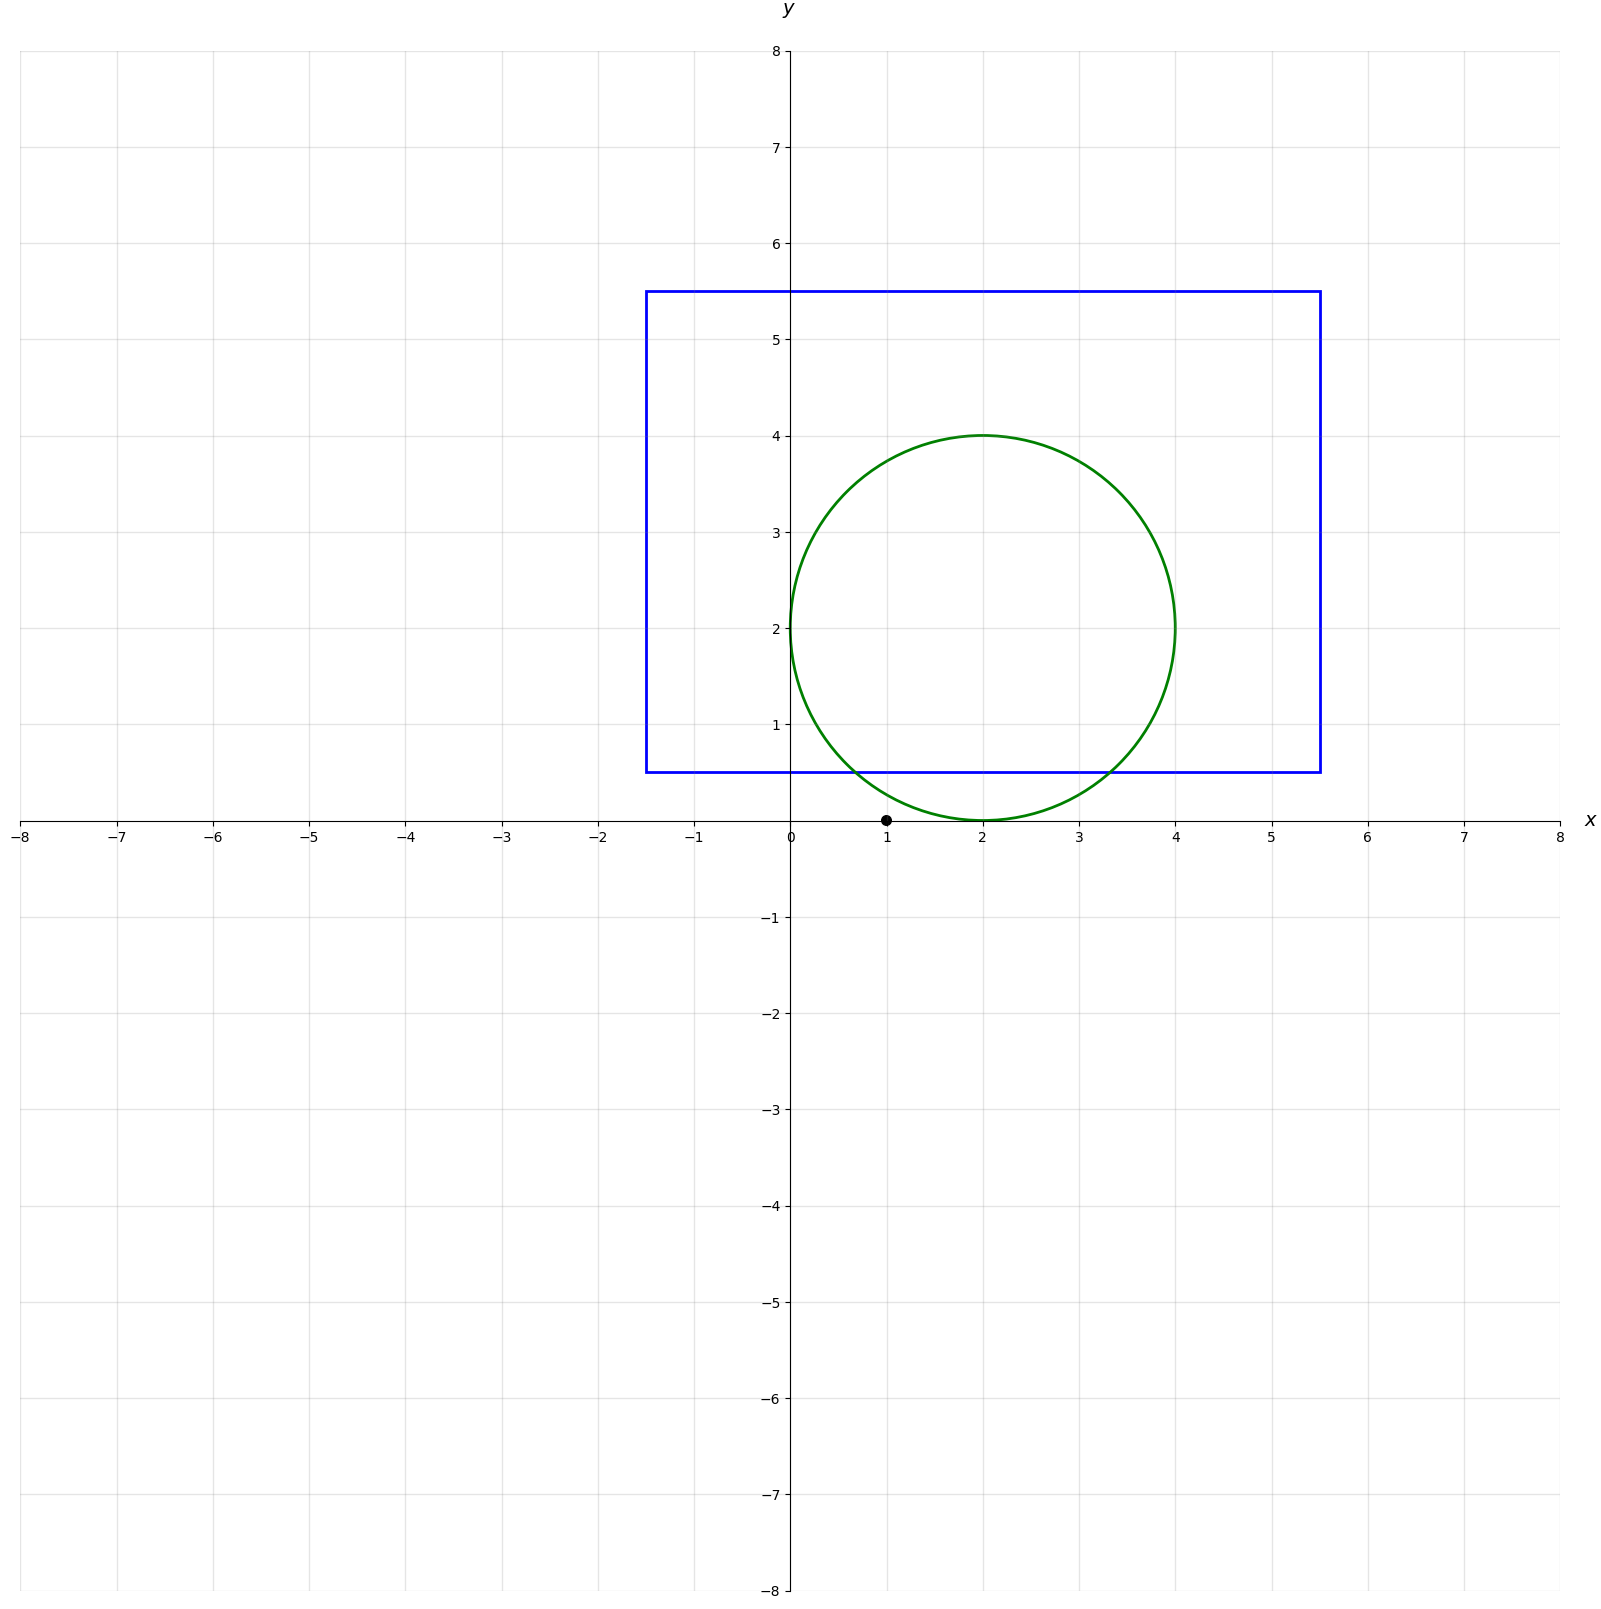

In [6]:
from circle import Circle
from rectangle import Rectangle
from shape2dplotter import Shape2dPlotter

plotter = Shape2dPlotter(shape3, rectangle1, circle3,size=1, auto_plot=True, auto_size=True)

## Shape2dPlotter.plot() Test

not touching size or auto_plot

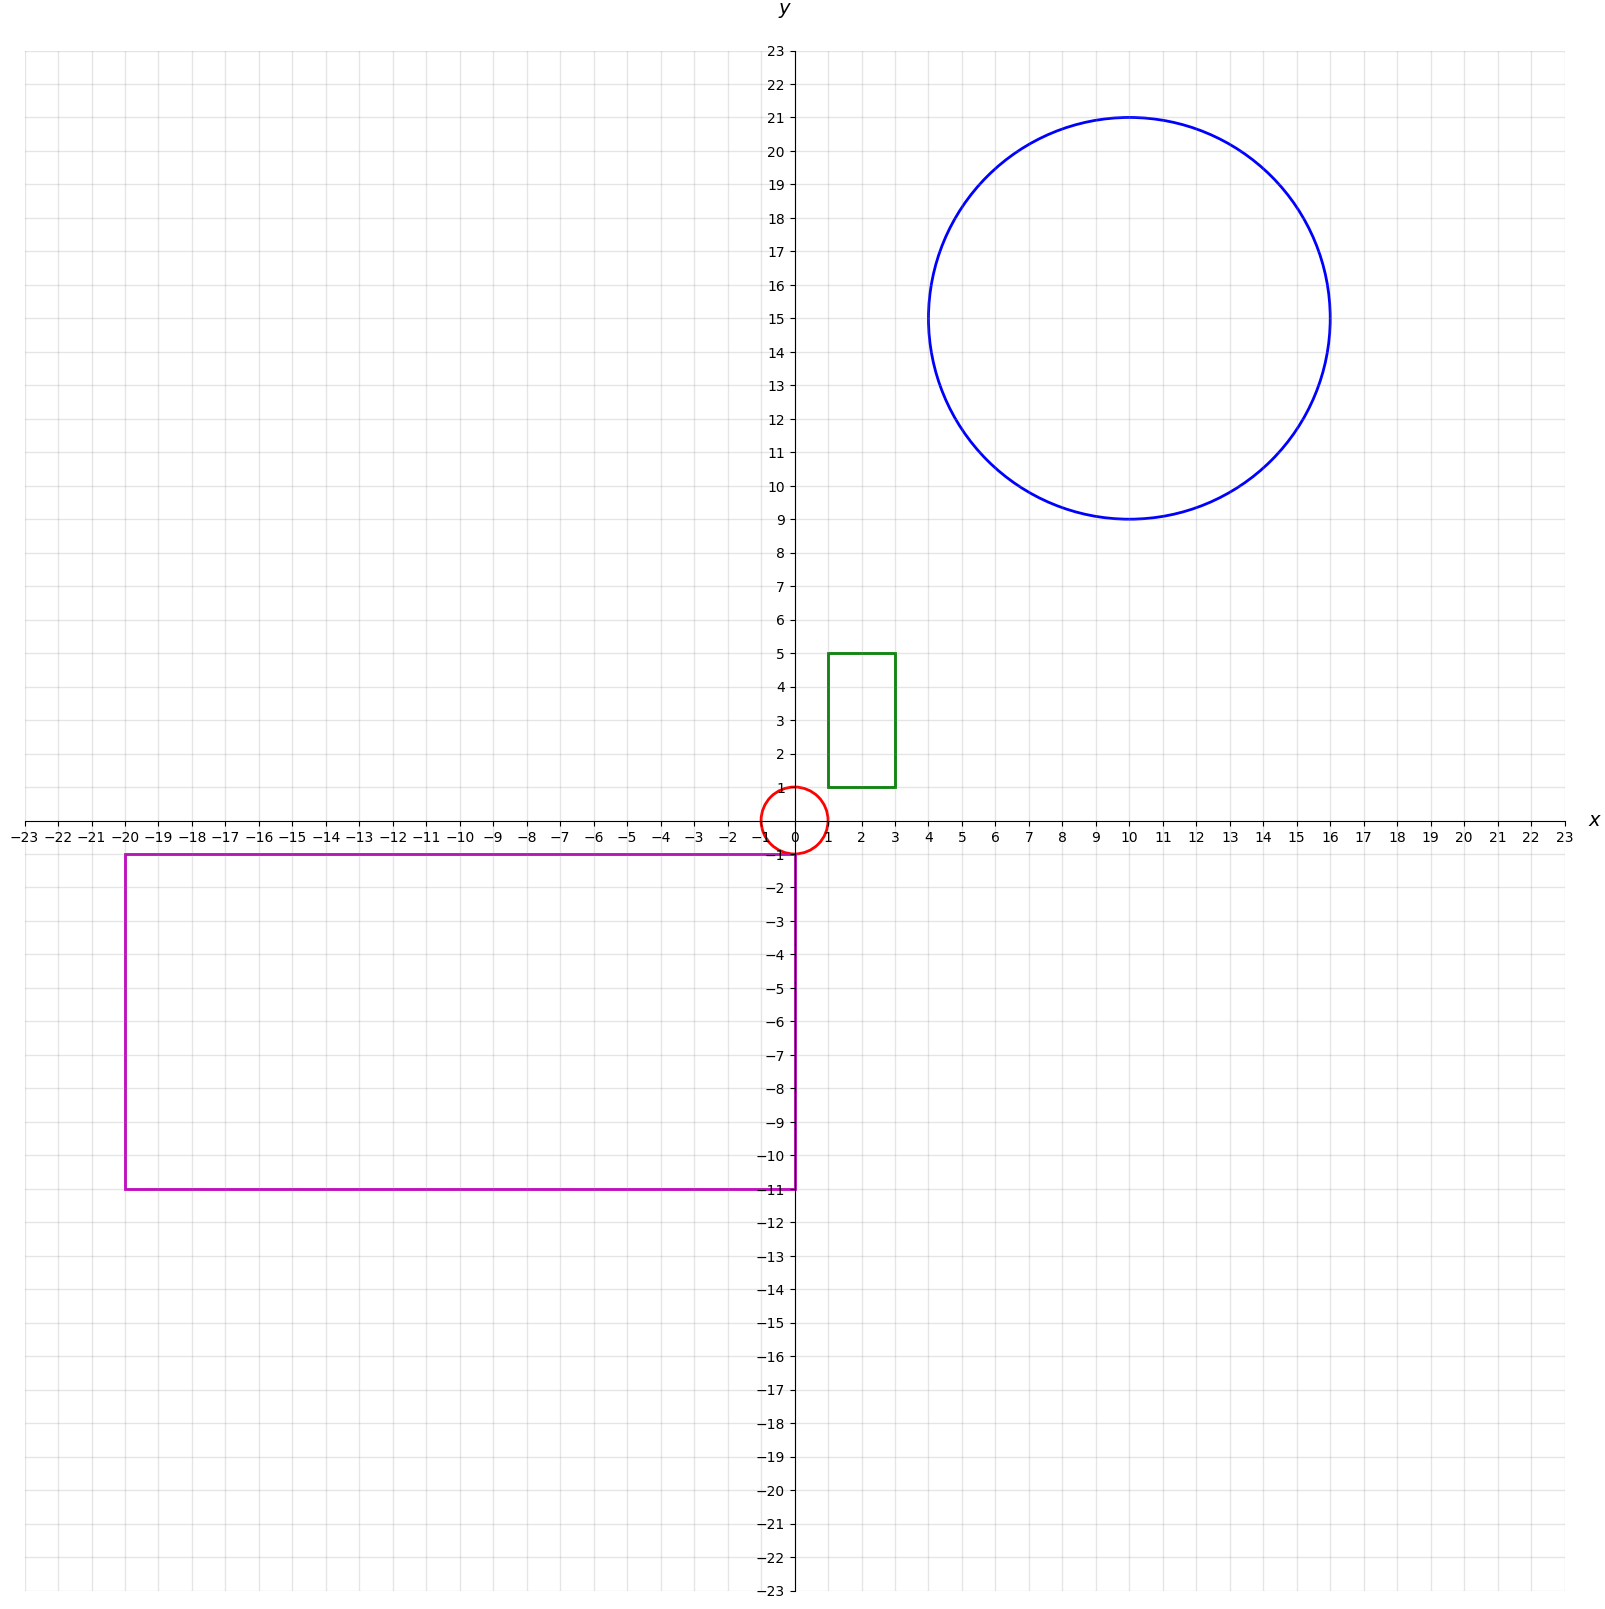

In [7]:
from shape2dplotter import Shape2dPlotter

circle1 = Circle(0,0,1)
circle2 = Circle(10,15,6)
rectangle1 = Rectangle(2,3,4,2)
rectangle2 = Rectangle(-10,-6, 10,20)

plotter = Shape2dPlotter(circle1,circle2,rectangle1,rectangle2)
plotter.plot(30, auto_size=True)

## auto_plot, cube and sphere test

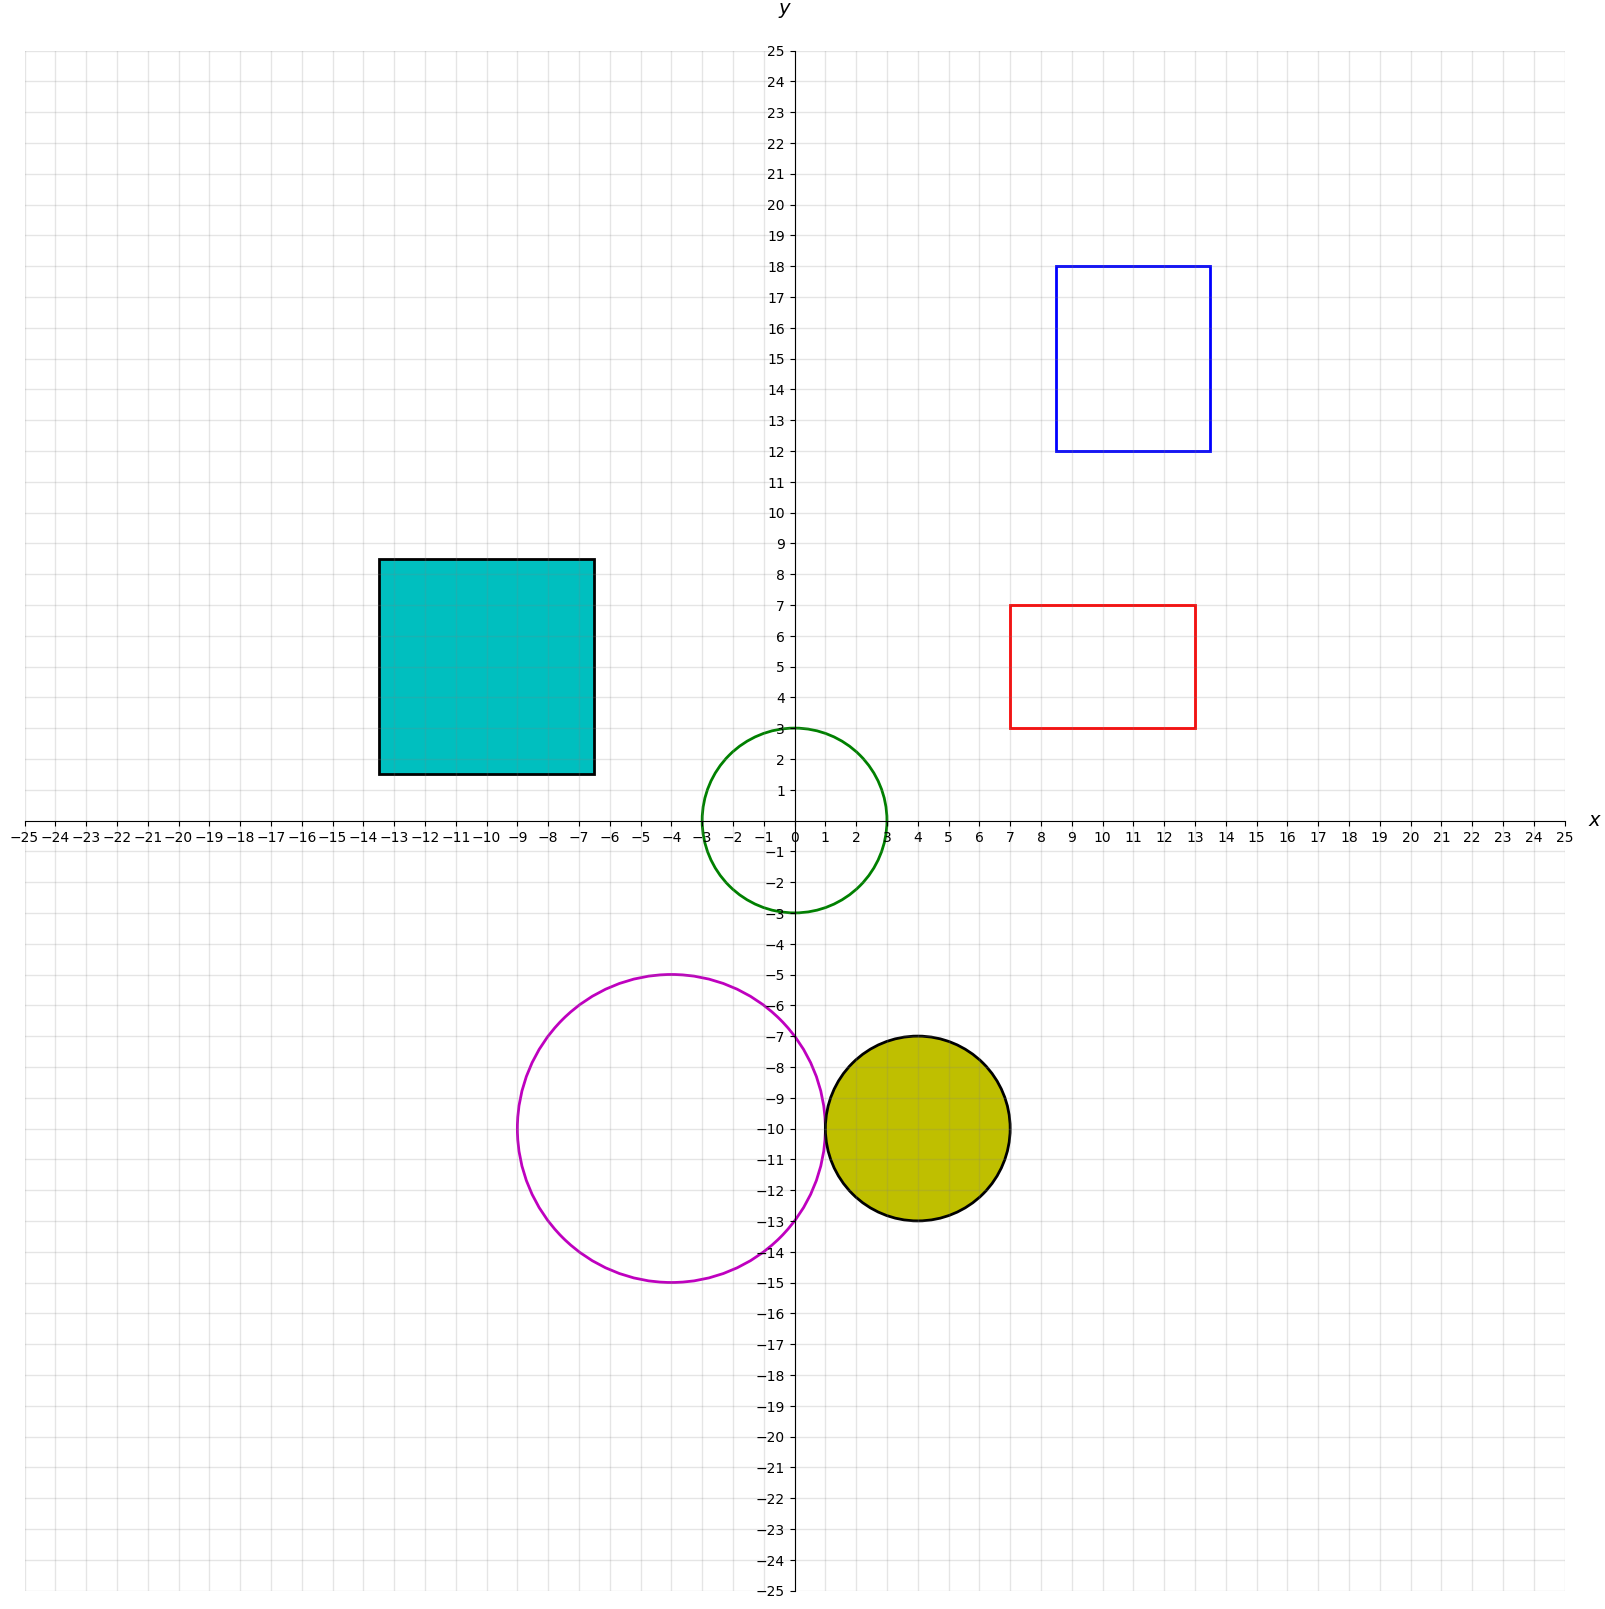

In [8]:
from shape2dplotter import Shape2dPlotter
from rectangle import Rectangle
from circle import Circle
from sphere import Sphere
from cube import Cube

circle1 = Circle(0,0,3)
circle2 = Circle(-4,-10, 5)
sphere1 = Sphere(4,-10, 3)
rectangle1 = Rectangle(10, 5, 4, 6)
rectangle2 = Rectangle(11,15, 6 ,5)
cube1 = Cube(-10, 5, 7)

Shape2dPlotter(rectangle1,rectangle2, circle1, circle2, cube1, sphere1, auto_plot=True, size=25, auto_size=False)


## Cube

#### Manual testing cube

In [9]:
cube1 = Cube(2,3,10)
print(cube1)


A cube located at (x = 2, y 3) each side is 10 long it has the surface area of 600 and the volume of 1000


## Sphere

In [10]:
from sphere import Sphere

sphere1 = Sphere(0,0,1)
sphere2 = Sphere(2,3,10)
print(sphere2)
sphere1.volume , sphere2.volume, sphere1.area, sphere2.area

a sphere located at (x:2, y:3) that has a radius of 10 it has a surface area of 1256.6370614359173 and a volume of 4188.790204786391


(4.1887902047863905, 4188.790204786391, 12.566370614359172, 1256.6370614359173)

In [11]:
sphere1.is_unit_circle()


True